# City Level Data

https://nccd.cdc.gov/500_Cities/rdPage.aspx?rdReport=DPH_500_Cities.ComparisonReport&Locations=1759000,2507000&rdRequestForwarding=Form

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-dark')




Bad key "lines.markeredgecolor" on line 81 in
/home/ubuntu/git/Data-Analysis/statistics/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [72]:
b_p = 0.164
b_ci = [0.161, 0.166]
b_pop = 617594
b_n = (1 - 0.165) * b_pop


p_p = 0.199
p_ci = [0.194, 0.203]
p_pop = 115105
p_n = (1 - 0.251) * p_pop 

z_95 = 1.96

n = 30

b_sigma = ((b_ci[1] - b_p) / z_95) * 1
p_sigma = ((p_ci[1] - p_p) / z_95) * 1

print(f'Standard deviation for Boston: {b_sigma}')
print(f'Standard deviation for Peoria: {p_sigma}')

Standard deviation for Boston: 0.001020408163265307
Standard deviation for Peoria: 0.002040816326530614


In [73]:
b_se = np.sqrt((b_p * (1 - b_p)) / b_n)
p_se = np.sqrt((p_p * (1 - p_p)) / p_n)

se_diff = np.sqrt(np.square(b_se) + np.square(p_se))
(b_p - p_p) + 1.96 * se_diff

-0.03214973385531325

In [74]:
(b_p - p_p) - 1.96 * se_diff

-0.037850266144686756

In [109]:
p_dist = np.random.normal(loc = p_p, scale = p_sigma, size = int(p_n))
b_dist = np.random.normal(loc = b_p, scale = b_sigma, size = int(b_n))
b = np.repeat('boston', repeats = len(b_dist))
p = np.repeat('peoria', repeats = len(p_dist))

In [110]:
scipy.stats.norm.interval(0.95, loc = b_p, scale = b_sigma)

(0.16200003675046934, 0.16599996324953067)

In [111]:
scipy.stats.norm.interval(0.95, loc = p_p, scale = p_sigma)

(0.19500007350093868, 0.20299992649906135)

In [112]:
import pandas as pd
dist_df = pd.DataFrame({'s': list(b_dist) + list(p_dist)})
dist_df['city'] = list(b) + list(p)
dist_df.groupby('city').describe()

s                                                             \
           count      mean       std       min       25%       50%      75%   
city                                                                          
boston  515690.0  0.163999  0.001022  0.158979  0.163311  0.163998  0.16469   
peoria   86213.0  0.199004  0.002035  0.189760  0.197630  0.199010  0.20038   

                  
             max  
city              
boston  0.168608  
peoria  0.207183

In [113]:
import matplotlib
matplotlib.get_configdir()

'/home/ubuntu/.config/matplotlib'

In [115]:
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])

['#00BEFF', '#D4CA3A', '#FF6DAE', '#67E1B5', '#EBACFA', '#9E9E9E', '#F1988E', '#5DB15A', '#E28544', '#52B8AA']


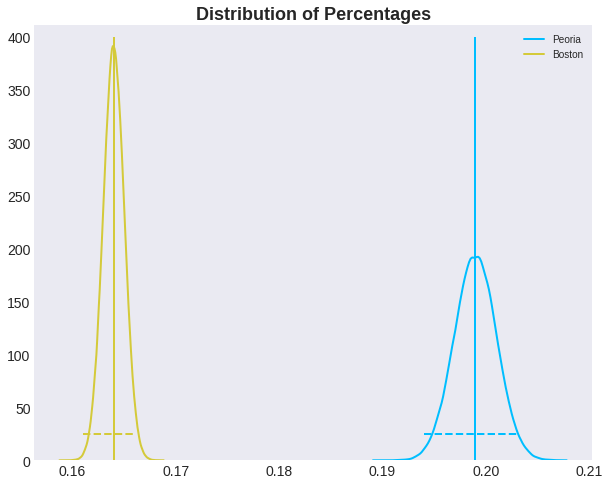

In [119]:
import seaborn as sns
plt.figure(figsize = (10, 8))
p1 = sns.kdeplot(p_dist, label = 'Peoria')
p2 = sns.kdeplot(b_dist, label = 'Boston')
plt.legend(); plt.title('Distribution of Percentages');
x = plt.gca()
plt.vlines([b_p, p_p], ymin = 0, ymax = 400, colors = ['#D4CA3A', '#00BEFF']);
plt.hlines([25], xmin = b_ci[0], xmax = b_ci[1], colors = ['#D4CA3A'], linestyles = '--')
plt.hlines([25], xmin = p_ci[0], xmax = p_ci[1], colors = ['#00BEFF'], linestyles = '--');

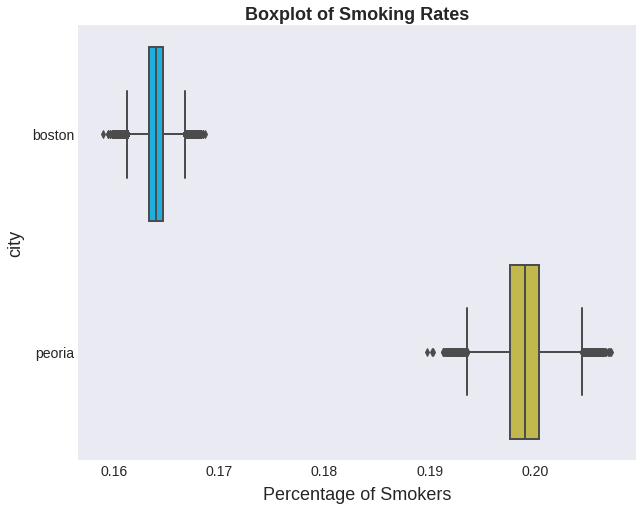

In [124]:
plt.figure(figsize = (10, 8))
sns.boxplot(x = 's', y = 'city', data = dist_df);
plt.xlabel('Percentage of Smokers');
plt.title('Boxplot of Smoking Rates');

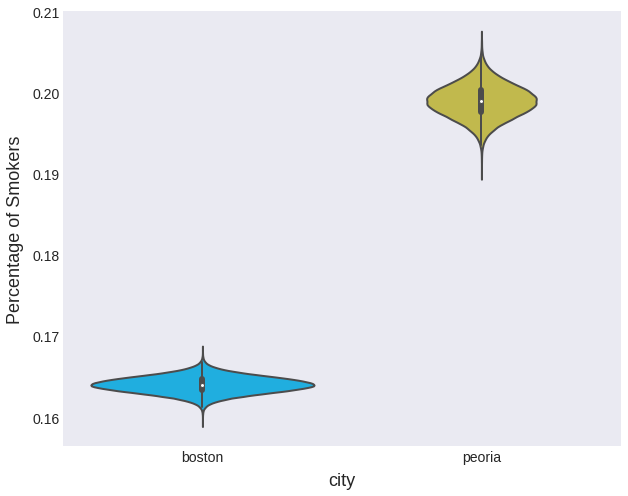

In [123]:
plt.figure(figsize = (10, 8))
sns.violinplot(y = 's', x = 'city', data = dist_df);
plt.ylabel('Percentage of Smokers');
plt.title('Violinplot of Smoking Rates');